# Isha|n>'s Intro To Python Data Science for FRC

Hello nerds, so you want to learn how to use python to manage and analyse FRC data? Good idea! Lets get started!

## Part 1: Setting up your note book
This first cell just imports the neeceary libraires for our code

- Pandas is a library that will help us deal with tables, Comma Seperated Value file CSVs and data frames

- Matplotlib will allow us to make plots and graphs

- Numpy lets us do math more easily and also allows for an altertive ways to create arrays and matrixes

In [6]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np


## Part 2: Understanding DataFrames

#### Before we get too far into messing with our new dataframe, we should perhaps understand the structure of a pandas data frame. 

#### Lets say we had we surveyd 3 cats and asked them their name, species, and favourite FRC teams. We could store each response in an array.

In [16]:
# create array of cat names

catName = ['Rupert',"Chester", "Lenny"]

# create array of cat species

catSpecies = ['Lynx Lynx','Acinonyx Jubatus','Lynx Canadensis']

# create array of cat's fav teams

catFavTeam = ['ChainLynx','Jack-in-the-Bot','ChainLynx']

**Now let's say we want to print all the responses from the first respondent. we'd have to call the 0th index which corresponds to the first entry.**

In [17]:
print(catName)

['Rupert', 'Chester', 'Lenny']


**We can then combine them do something like this:**

In [18]:
print(f"Name: {catName[0]} Species: {catSpecies[0]} Favourite FRC Team: {catFavTeam[0]}")# this is a f print, it allows special formatting with using clunky seprators to make your print statment.

Name: Rupert Species: Lynx Lynx Favourite FRC Team: ChainLynx


NumPy arrays are faster and more compact than Python lists. An numpy array consumes less memory and is convenient to use. NumPy uses much less memory to store data and it provides a mechanism of specifying the data types. This allows the code to be optimized even further. While the nefits are neglible at the scale of your example, they will be benefitial as we scale up.

In [20]:
# Method 1: Converting lists into numpy arrays
catName_np = np.array(catName)
catFavTeam_np = np.array(catFavTeam)

# Method 2: Converting lists into numpy arrays
catSpecies_np = np.array(['Rupert',"Chester", "Lenny"])

# Stack arrays horizontally to make a single np matrix
catMatrix = np.column_stack((catName_np, catSpecies_np, catFavTeam_np))

print("Cat Matrix:")
display(catMatrix)

Cat Matrix:


array([['Rupert', 'Rupert', 'ChainLynx'],
       ['Chester', 'Chester', 'Jack-in-the-Bot'],
       ['Lenny', 'Lenny', 'ChainLynx']], dtype='<U15')

**Here are three diffrent ways of combining our data into dataframes. Notice how they all create identical dataframes.**

In [11]:
# creating a dataframe
catDFV1= pd.DataFrame({'Name': ['Rupert',"Chester", "Lenny"], 'Species': ['Lynx Lynx','Acinonyx Jubatus','Lynx Canadensis'], 'Favourite FRC Team': ['ChainLynx','Jack-in-the-Bot','ChainLynx']})
catDFV2= pd.DataFrame({'Name': catName, 'Species': catSpecies_np, 'Favourite FRC Team': catFavTeam})
catDFV3= pd.DataFrame(data = catMatrix, columns=['Name', 'Species','Favourite FRC Team'])

# displaying the dataframe
display(catDFV1) #note how we use display instead of print
display(catDFV2) 
display(catDFV3) 

,Name,Species,Favourite FRC Team
0,Rupert,Lynx Lynx,ChainLynx
1,Chester,Acinonyx Jubatus,Jack-in-the-Bot
2,Lenny,Lynx Canadensis,ChainLynx


,Name,Species,Favourite FRC Team
0,Rupert,Lynx Lynx,ChainLynx
1,Chester,Acinonyx Jubatus,Jack-in-the-Bot
2,Lenny,Lynx Canadensis,ChainLynx
3,709,989,1701


,Name,Species,Favourite FRC Team
0,Rupert,Lynx Lynx,ChainLynx
1,Chester,Acinonyx Jubatus,Jack-in-the-Bot
2,Lenny,Lynx Canadensis,ChainLynx
3,709,989,1701


## Part 3: Plotting with DataFrame

**Ok now lets say we wanted to plot a histogram of what the most common favourite team was. A histogram is a graphical representation of continous data where the area of each bar correlates to frequency of occurence.**

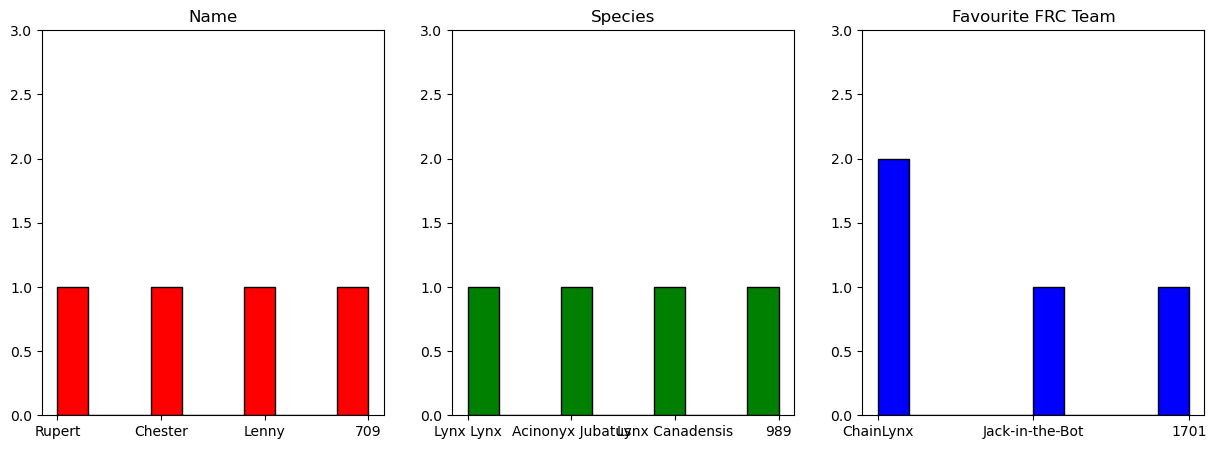

In [12]:
# Create 1x3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot histogram for 'Name'
axs[0].hist(catDFV3['Name'], color='r', edgecolor='black')
axs[0].set_ylim(0,3)
axs[0].set_title('Name')

# Plot histogram for 'Species'
axs[1].hist(catDFV3['Species'], color='g', edgecolor='black')
axs[1].set_ylim(0,3)
axs[1].set_title('Species')

# Plot histogram for 'Favourite FRC Team'
axs[2].hist(catDFV3['Favourite FRC Team'], color='b', edgecolor='black')
axs[2].set_ylim(0,3)
axs[2].set_title('Favourite FRC Team')

# Show the plot
plt.show()


## Part 4: Data Frame operations

## Part ???: Importing Master Scouting Data
Im going to assume you've already converted data into a CSV. If not get your spreadsheet, it should be File>>Download>>CSV.

In [ ]:
masterScoutingDF = pd.read_csv('ScoutingFRCFiles/MasterScoutingData3.csv') 
display(masterScoutingDF)
masterScoutingDF['2024 PSEFS (initial)'] = masterScoutingDF['2024 PSEFS (initial)'].str.replace('-','10')
masterScoutingDF['2024 PSEFS (initial)'] = masterScoutingDF['2024 PSEFS (initial)'].astype('int64')

In [ ]:
# Create 1x3 subplots
                                                                                                
                                                                                                
fig, axs = plt.subplots(3, 1, figsize=(15, 10))
# Filter the DataFrame to only include rows where '2024 PSEFS (initial)' is <= 5
filteredDF = masterScoutingDF[masterScoutingDF['2024 PSEFS (initial)'] <= 5]

# Then plot using the filtered DataFrame
axs[0].plot(filteredDF['#'], filteredDF['2024 PSEFS (initial)'], 'o-', color='r')


axs[0].set_ylim(-1,5.5)
axs[0].set_title('Name')

# Plot histogram for 'Species'
axs[1].scatter( filteredDF['2024 PSEFS (initial)'], filteredDF['Rookie Year'], color='r', edgecolor='black')
axs[1].set_title('Species')

# Plot histogram for 'Species'
axs[2].scatter( filteredDF['Years Competed'], filteredDF['2024 PSEFS (initial)'], color='r', edgecolor='black')
axs[2].set_title('Species')

